In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Original dataset

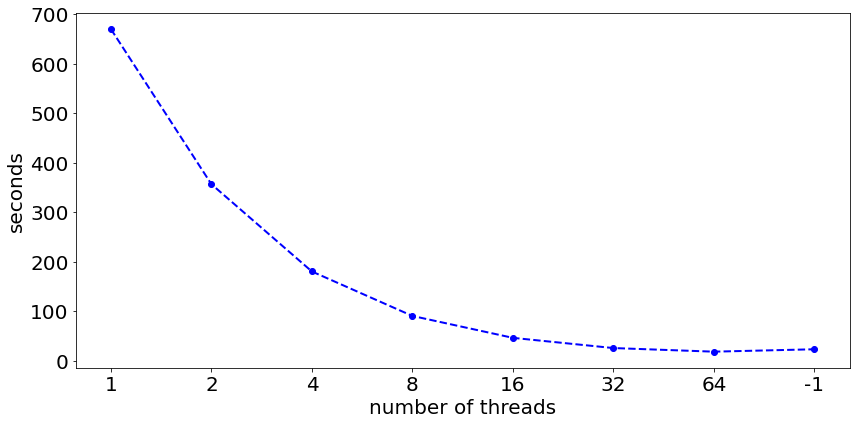

In [27]:
dicc = {}
number = 2**7
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_SyntheticData/dtwParallel_d.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values = []
keys = n_threads
for i in range(len(keys)):
    values.append(np.mean(dicc[keys[i]]))
    
fig, axis = plt.subplots(1,1,figsize=(12,6))

axis.plot(values,'bo--',linewidth=2,alpha=1)

keys_finales = list(map(str, n_threads)) 
plt.xticks(np.arange(len(n_threads)), keys_finales, fontsize=20)
plt.yticks(fontsize=20)
axis.set_xlabel('number of threads',fontsize=20) 
axis.set_ylabel('seconds',fontsize=20) 
plt.tight_layout()
#plt.savefig("../Figures/dtwParallel_dtw_D.png")

## DTW independent

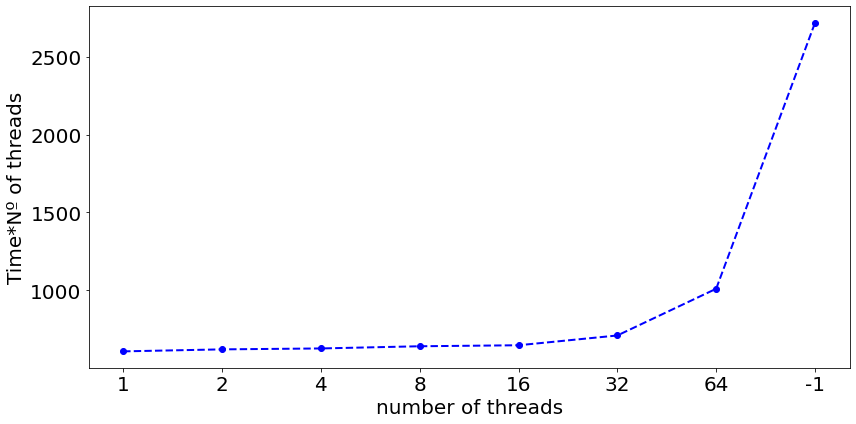

In [28]:
dicc = {}
number = 2**7
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E1_SyntheticData/time_dtwParallel_dep.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values = []
keys = n_threads
for i in range(len(keys)):
    n=n_threads[i]
    if i == (len(keys)-1):
        n=128
    values.append(np.mean(dicc[keys[i]])*n)
    
fig, axis = plt.subplots(1,1,figsize=(12,6))

axis.plot(values,'bo--',linewidth=2,alpha=1)

keys_finales = list(map(str, n_threads)) 
plt.xticks(np.arange(len(n_threads)), keys_finales, fontsize=20)
plt.yticks(fontsize=20)
axis.set_xlabel('number of threads',fontsize=20) 
axis.set_ylabel('Time*Nº of threads',fontsize=20) 
plt.tight_layout()
#plt.savefig("../Figures/dtwParallel_dtw_D.png")

## Other visualization

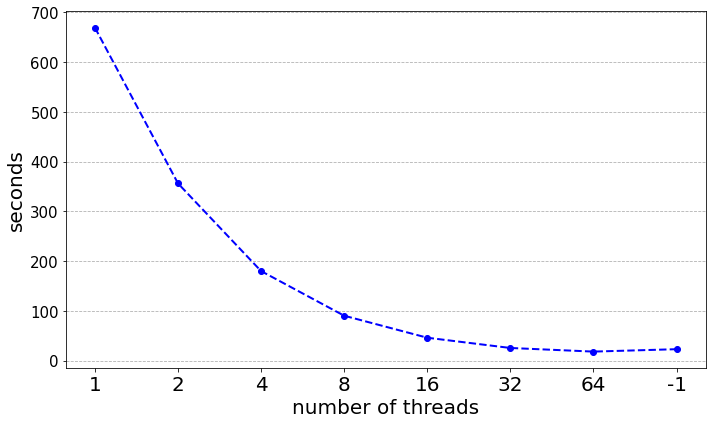

In [29]:
dicc = {}
number = 2**7
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_SyntheticData/dtwParallel_d.txt', dtype=str)
#data = np.loadtxt('./E2_FinanceData/time_dtwParallel_dep.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values = []

ymin = []
ymax = []

keys = n_threads
for i in range(len(keys)):
    ymin.append(np.min(dicc[keys[i]]))
    ymax.append(np.max(dicc[keys[i]]))
    values.append(np.mean(dicc[keys[i]]))

fig, axis = plt.subplots(1,1,figsize=(10,6))

axis.plot(values,'bo--',linewidth=2,alpha=1)


# plt.fill_between(np.arange(len(n_threads)), ymin, ymax, alpha=0.2, color='green',label='error band')

keys_finales = list(map(str, n_threads)) 
plt.xticks(np.arange(len(n_threads)), keys_finales, fontsize=20)
keys_finales_2 = np.arange(0,750,100)
plt.yticks(keys_finales_2, fontsize=15)
axis.set_xlabel('number of threads',fontsize=20) 
axis.set_ylabel('seconds',fontsize=20) 
plt.tight_layout()
axis.yaxis.grid(linestyle = 'dashed')  # grid lines
axis.set_axisbelow(True)  # grid lines are behind the rest
plt.savefig("../Figures/dtwParallel_dtw_D.png")

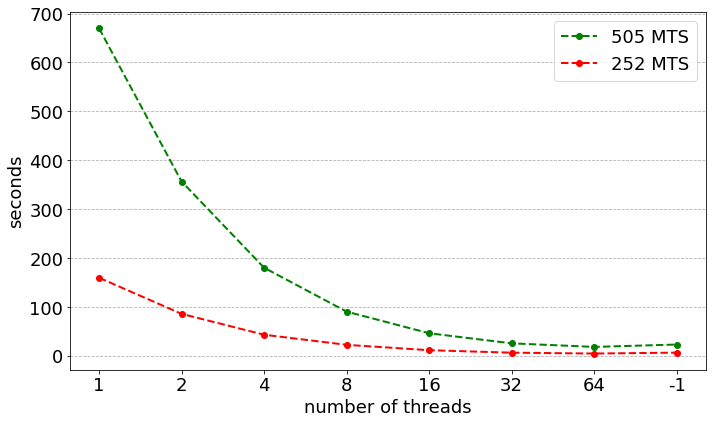

In [30]:
# 505 MTS
dicc = {}
number = 2**7
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_SyntheticData/dtwParallel_d.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values_505 = []

ymin = []
ymax = []

keys = n_threads
for i in range(len(keys)):
    ymin.append(np.min(dicc[keys[i]]))
    ymax.append(np.max(dicc[keys[i]]))
    values_505.append(np.mean(dicc[keys[i]]))
    
# 256 MTS
dicc = {}
number = 2**7
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_SyntheticData/dtwParallel_d_252.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values_256 = []

ymin = []
ymax = []

keys = n_threads
for i in range(len(keys)):
    ymin.append(np.min(dicc[keys[i]]))
    ymax.append(np.max(dicc[keys[i]]))
    values_256.append(np.mean(dicc[keys[i]]))

fig, axis = plt.subplots(1,1,figsize=(10,6))

axis.plot(values_505,'go--',linewidth=2,alpha=1, label="505 MTS")
axis.plot(values_256,'ro--',linewidth=2,alpha=1, label="252 MTS")


# plt.fill_between(np.arange(len(n_threads)), ymin, ymax, alpha=0.2, color='green',label='error band')

keys_finales = list(map(str, n_threads)) 
plt.xticks(np.arange(len(n_threads)), keys_finales, fontsize=18)
keys_finales_2 = np.arange(0,750,100)
plt.yticks(keys_finales_2, fontsize=18)
axis.set_xlabel('number of threads',fontsize=18) 
axis.set_ylabel('seconds',fontsize=18) 
plt.tight_layout()
axis.yaxis.grid(linestyle = 'dashed')  # grid lines
axis.set_axisbelow(True)  # grid lines are behind the rest
plt.legend(fontsize=18)
plt.savefig("../Figures/dtwParallel_dtw_D.png")

## Comparison of computational time between packages.

In [31]:
data = np.loadtxt('../results_E2_SyntheticData/dtw.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtw_value = np.mean(a)

In [32]:
data = np.loadtxt('../results_E2_SyntheticData/fastdtw.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
fastdtw_value = np.mean(a)

In [33]:
data = np.loadtxt('../results_E2_SyntheticData/dtaidistance_dep.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtaidistance_value = np.mean(a)

In [34]:
# 505 MTS
dicc = {}
number = 2**7
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_SyntheticData/dtwParallel_d.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values_505 = [dtw_value, fastdtw_value, dtaidistance_value, np.mean(dicc[32])]

In [35]:
data = np.loadtxt('../results_E2_SyntheticData/dtw_252.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtw_value = np.mean(a)

In [36]:
data = np.loadtxt('../results_E2_SyntheticData/fastdtw_252.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
fastdtw_value = np.mean(a)

In [37]:
data = np.loadtxt('../results_E2_SyntheticData/dtaidistance_dep_252.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtaidistance_value = np.mean(a)

In [39]:
# 256 MTS
dicc = {}
number = 2**7
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_SyntheticData/dtwParallel_d_252.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values_252 = [dtw_value, fastdtw_value, dtaidistance_value, np.mean(dicc[32])]

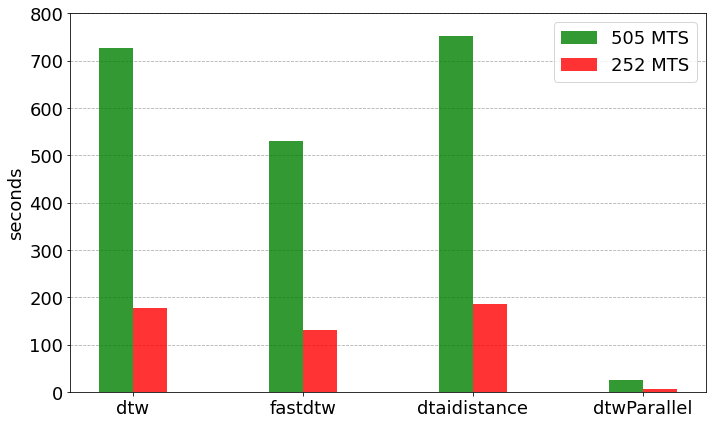

In [40]:
fig,axis = plt.subplots(1,1,figsize=(10,6))

plt.bar(np.arange(4), values_505, color='green', width=0.2, alpha=0.8, label="505 MTS")
plt.bar(np.arange(4)+0.2, values_252, color='red', width=0.2, alpha=0.8, label="252 MTS")

keys_finales = ['dtw', 'fastdtw', 'dtaidistance', 'dtwParallel'] 
plt.xticks(np.arange(4)+0.1, keys_finales, fontsize=18)
keys_finales_2 = np.arange(0,850,100)
plt.yticks(keys_finales_2, fontsize=18)
axis.set_ylabel('seconds',fontsize=18) 
plt.tight_layout()
axis.yaxis.grid(linestyle = 'dashed')  # grid lines
axis.set_axisbelow(True)  # grid lines are behind the rest
plt.legend(fontsize=18)

plt.savefig("../Figures/comparativeTime.png")

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(12,6))

axis.plot(values,'bo--',linewidth=2,alpha=1)

keys_finales = ['dtw', 'fastdtw', 'dtaidistance', 'dtwParallel'] 
plt.xticks(np.arange(4), keys_finales, fontsize=20)
plt.yticks(fontsize=20)
axis.set_ylabel('seconds',fontsize=20) 
plt.tight_layout()
plt.savefig("../Figures/comparativeTime.png")